<a href="https://colab.research.google.com/github/19PA1A0536/Artificial-intelligence-and-machine-learning-2nd-year-1st-sem/blob/master/adaboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt #for plotting the graphs
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification

In [0]:

from sklearn.model_selection import train_test_split # used for splitting our data into trainig and testing here *randomly
from sklearn.ensemble import RandomForestClassifier # importing RandomForest from sklearn
from sklearn.tree import DecisionTreeClassifier # impporting DecisionTree classifier from sklearn
from sklearn.metrics import accuracy_score # importing required model evaluation techniques

In [0]:
# Import (upload) diabetes dataset to perform opertions on it
hi=pd.read_csv("/content/pima-indians-diabetes-database.zip")



In [14]:
hi.head(5) # first 5 rows in dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
hi.shape 
#It shows no.of rows and coloums in dataset

(768, 9)

In [16]:
hi.isnull().any 
#Tells us wether our dataset contain empty(NAN) values in dataset or not

<bound method DataFrame.any of      Pregnancies  Glucose  ...    Age  Outcome
0          False    False  ...  False    False
1          False    False  ...  False    False
2          False    False  ...  False    False
3          False    False  ...  False    False
4          False    False  ...  False    False
..           ...      ...  ...    ...      ...
763        False    False  ...  False    False
764        False    False  ...  False    False
765        False    False  ...  False    False
766        False    False  ...  False    False
767        False    False  ...  False    False

[768 rows x 9 columns]>

In [18]:
hi.isnull().any().sum()
# To find how many empty (NAN) values in dataset

0

In [0]:
# Dividing our data into featuers and labels
x=hi[["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]]
y=hi["Outcome"]

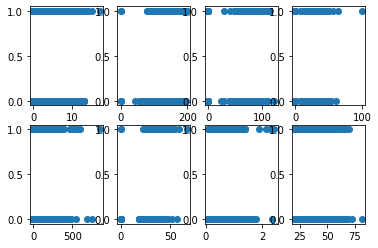

In [23]:
# Now plot the graph using features and labels
#plot the graph with each (individual) feature to the label

f,ax=plt.subplots(nrows=2,ncols=4)
x0=hi["Pregnancies"]
x1=hi["Glucose"]
x2=hi["BloodPressure"]
x3=hi["SkinThickness"]
x4=hi["Insulin"]
x5=hi["BMI"]
x6=hi["DiabetesPedigreeFunction"]
x7=hi["Age"]
y=hi["Outcome"]

ax[0,0].scatter(x0,y)
ax[0,1].scatter(x1,y)
ax[0,2].scatter(x2,y)
ax[0,3].scatter(x3,y)
ax[1,0].scatter(x4,y)
ax[1,1].scatter(x5,y)
ax[1,2].scatter(x6,y)
ax[1,3].scatter(x7,y)

#***Random Forest*** 



In [0]:
#Divide our data in to 2 parts for training and testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [0]:
# preparing the model here n_estimators=no.of decision trees made- we selected 50 deecision trees
model=RandomForestClassifier(n_estimators=50)

In [26]:
#fitting our training data in to model
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [27]:
#Our y_prediction
y_predict=model.predict(x_test)
print(y_predict)

[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1 1 1 0 1 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0
 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0
 0 0 0 0 0 0]


In [32]:
# comparing the actual values to predicted values
dataframe=pd.DataFrame({"actual":y_test,"predicted":y_predict})
dataframe.head(5)

,actual,predicted
661,1,1
122,0,0
113,0,0
14,1,1
529,0,0


In [34]:
# To find accuracy of our current model
print(accuracy_score(y_test,y_predict)*100)

79.22077922077922


In [36]:
#compare btw n_estimators and accuracy
comp=pd.DataFrame({"n_estimators":[50,100,150],"accuracy":[81.818,77.922,81.166]})
comp

,n_estimators,accuracy
0,50,81.818
1,100,77.922
2,150,81.166


#**Decision Tree** 

In [0]:
#preparing a model
mod1=DecisionTreeClassifier()

In [0]:
#fitting our training data in a model for prediction
b=mod1.fit(x_train,y_train)


In [0]:
# y prediction
y_predict1=mod1.predict(x_test)

In [49]:
# comparing actual values to predicted values
dataframe1=pd.DataFrame({"actual":y_test,"y_pred":y_predict1})
dataframe1.head()

,actual,y_pred
661,1,1
122,0,0
113,0,0
14,1,1
529,0,0


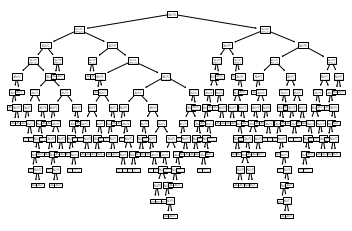

In [50]:
# plotting the decision tree using sklearn 
from sklearn import tree
tree.plot_tree(b.fit(x,y));

In [52]:
# finding the accuracy of the  model
print(accuracy_score(y_test,y_predict1)*100)

79.22077922077922


#**Ada Boost Classifier**

In [0]:
# importing RandomForest from sklearn
from sklearn.ensemble import AdaBoostClassifier

In [0]:
#Divide our dataset in to 2 parts---- train , test randomly
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [0]:
# Prepare a model
mod2=AdaBoostClassifier()

In [59]:
# trainig the model and predicting
mod2.fit(x_train,y_train)
y_pred2=mod2.predict(x_test)
print(y_pred2)

[1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1
 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 0 0 0 0 1
 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0
 1 1 1 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 1 1 0 0 0 0 1]


In [61]:
# comparing actual and predicted values
dataframea=pd.DataFrame({"actual":y_test,"predicted":y_pred2})
dataframea.head()

,actual,predicted
661,1,1
122,0,0
113,0,0
14,1,0
529,0,0


In [63]:
# finding the accuracy of our model
print(accuracy_score(y_test,y_pred2)*100)

75.32467532467533


In [64]:
#Comparing the performance of Random Forest,Decision Tree,Ada Boost
mainframe=pd.DataFrame({"classifier":["Randomforest","DecisionTree","AdaBoost"],"accuracy":[81.8181,78.5714,77.9220]})
mainframe

,classifier,accuracy
0,Randomforest,81.8181
1,DecisionTree,78.5714
2,AdaBoost,77.9220


#**Conclusion:**

In [0]:
By our observation we know that Random Forest is better than Decision Tree and AdaBoost
Accuracy of Random Forest is greater than Decision tree and AdaBoostClassifier
Adaboost and Decision Tree accuracy are nearly same so these 2 shows nearly same result